In [31]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#데이터 시각화 + 패키지
import seaborn as sns
#통계 분석 패키지
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
#그래프 표시
%matplotlib inline
#선형 회귀분석모델 formula(y ~ X1 + X2 +)
import statsmodels.formula.api as smf
#회귀분석의 정규성 확인
from statsmodels.api import qqplot,add_constant
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#학습용과 평가용 데이터 분리
from sklearn.model_selection import train_test_split
#선형회귀모형 
from sklearn.linear_model import LinearRegression
#변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
#평가함수
from sklearn.metrics import r2_score

matplotlib.rc('font',family = 'Noto sans CJK JP')
#음수 표시
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline

In [32]:
df_raw = pd.read_csv("/home/piai/문서/빅데이터분석실습/2. Big Data 분석/체질검사.csv",encoding = 'euc-kr')
df_raw.head() # 데이터 불러오기

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [33]:
df_raw.isnull().sum()  # 결측치 확인

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
GENDER     0
dtype: int64

In [34]:
df_raw[['WEIGHT','WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand = True)
df_raw[['HEIGHT','HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand = True)
df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')
df_raw.info() #  수치형 변수인 몸무게와 키 변수 처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [ ]:
df_raw = df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'], axis = 1)
# 단위를 나타내는 항목 제외

In [6]:
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [7]:
df_raw['WEIGHT'] = df_raw['WEIGHT'] * 0.45
df_raw['HEIGHT'] = df_raw['HEIGHT'] * 2.54
df_raw # 키는 inch단위에서 cm단위로 몸무게는 pound에서 kg으로 변환

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,163.4175,183.515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,75.6000,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,79.9875,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,66.4875,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,98.5500,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,93.3750,177.800,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9,여성
248,23.6,43,76.8375,171.450,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8,남성
249,20.9,35,73.2375,167.640,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9,남성
250,17.0,56,75.4875,173.990,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0,남성


In [8]:
df_raw['BMI'] = ((df_raw['WEIGHT']) / (df_raw['HEIGHT']**2)) * 10000
df_raw['GENDER'] = df_raw['GENDER'].replace(1,0).replace(2,1)
df_raw_dummy = pd.get_dummies(df_raw,columns = ['GENDER'], drop_first = True)
df_raw_dummy.head()
# 범주형 변수인 gender의 dummy 변수화와  키와 몸무게를 이용한 BMI 파생변수 추가

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI,GENDER_여성
0,35.2,46,163.4175,183.515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870,0
1,11.8,27,75.6000,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595,0
2,22.2,69,79.9875,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478,0
3,10.6,57,66.4875,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617,1
4,47.5,51,98.5500,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165,1


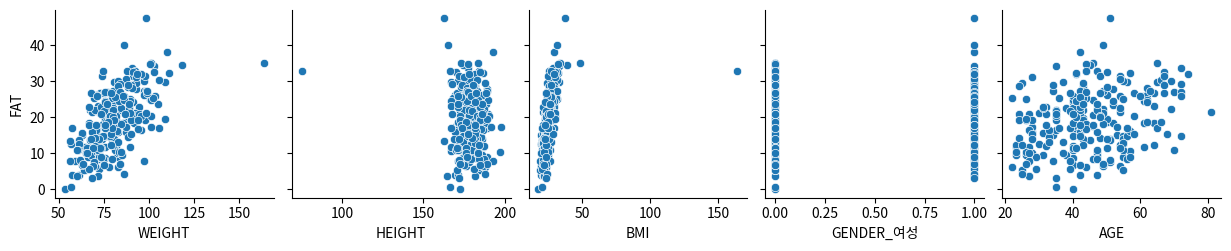

In [9]:
sns.pairplot(df_raw_dummy, y_vars = "FAT", x_vars = ["WEIGHT","HEIGHT","BMI","GENDER_여성","AGE"])
# 몸무게, 키, BMI, 성별과 나이가 FAT에 영향을 줄 것이라 예상하여 산점도를 출력

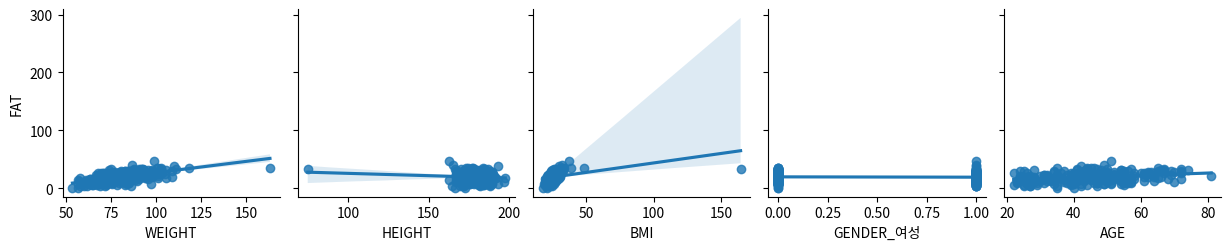

In [10]:
sns.pairplot(df_raw_dummy, y_vars = "FAT", x_vars = ["WEIGHT","HEIGHT","BMI","GENDER_여성","AGE"], kind = "reg")

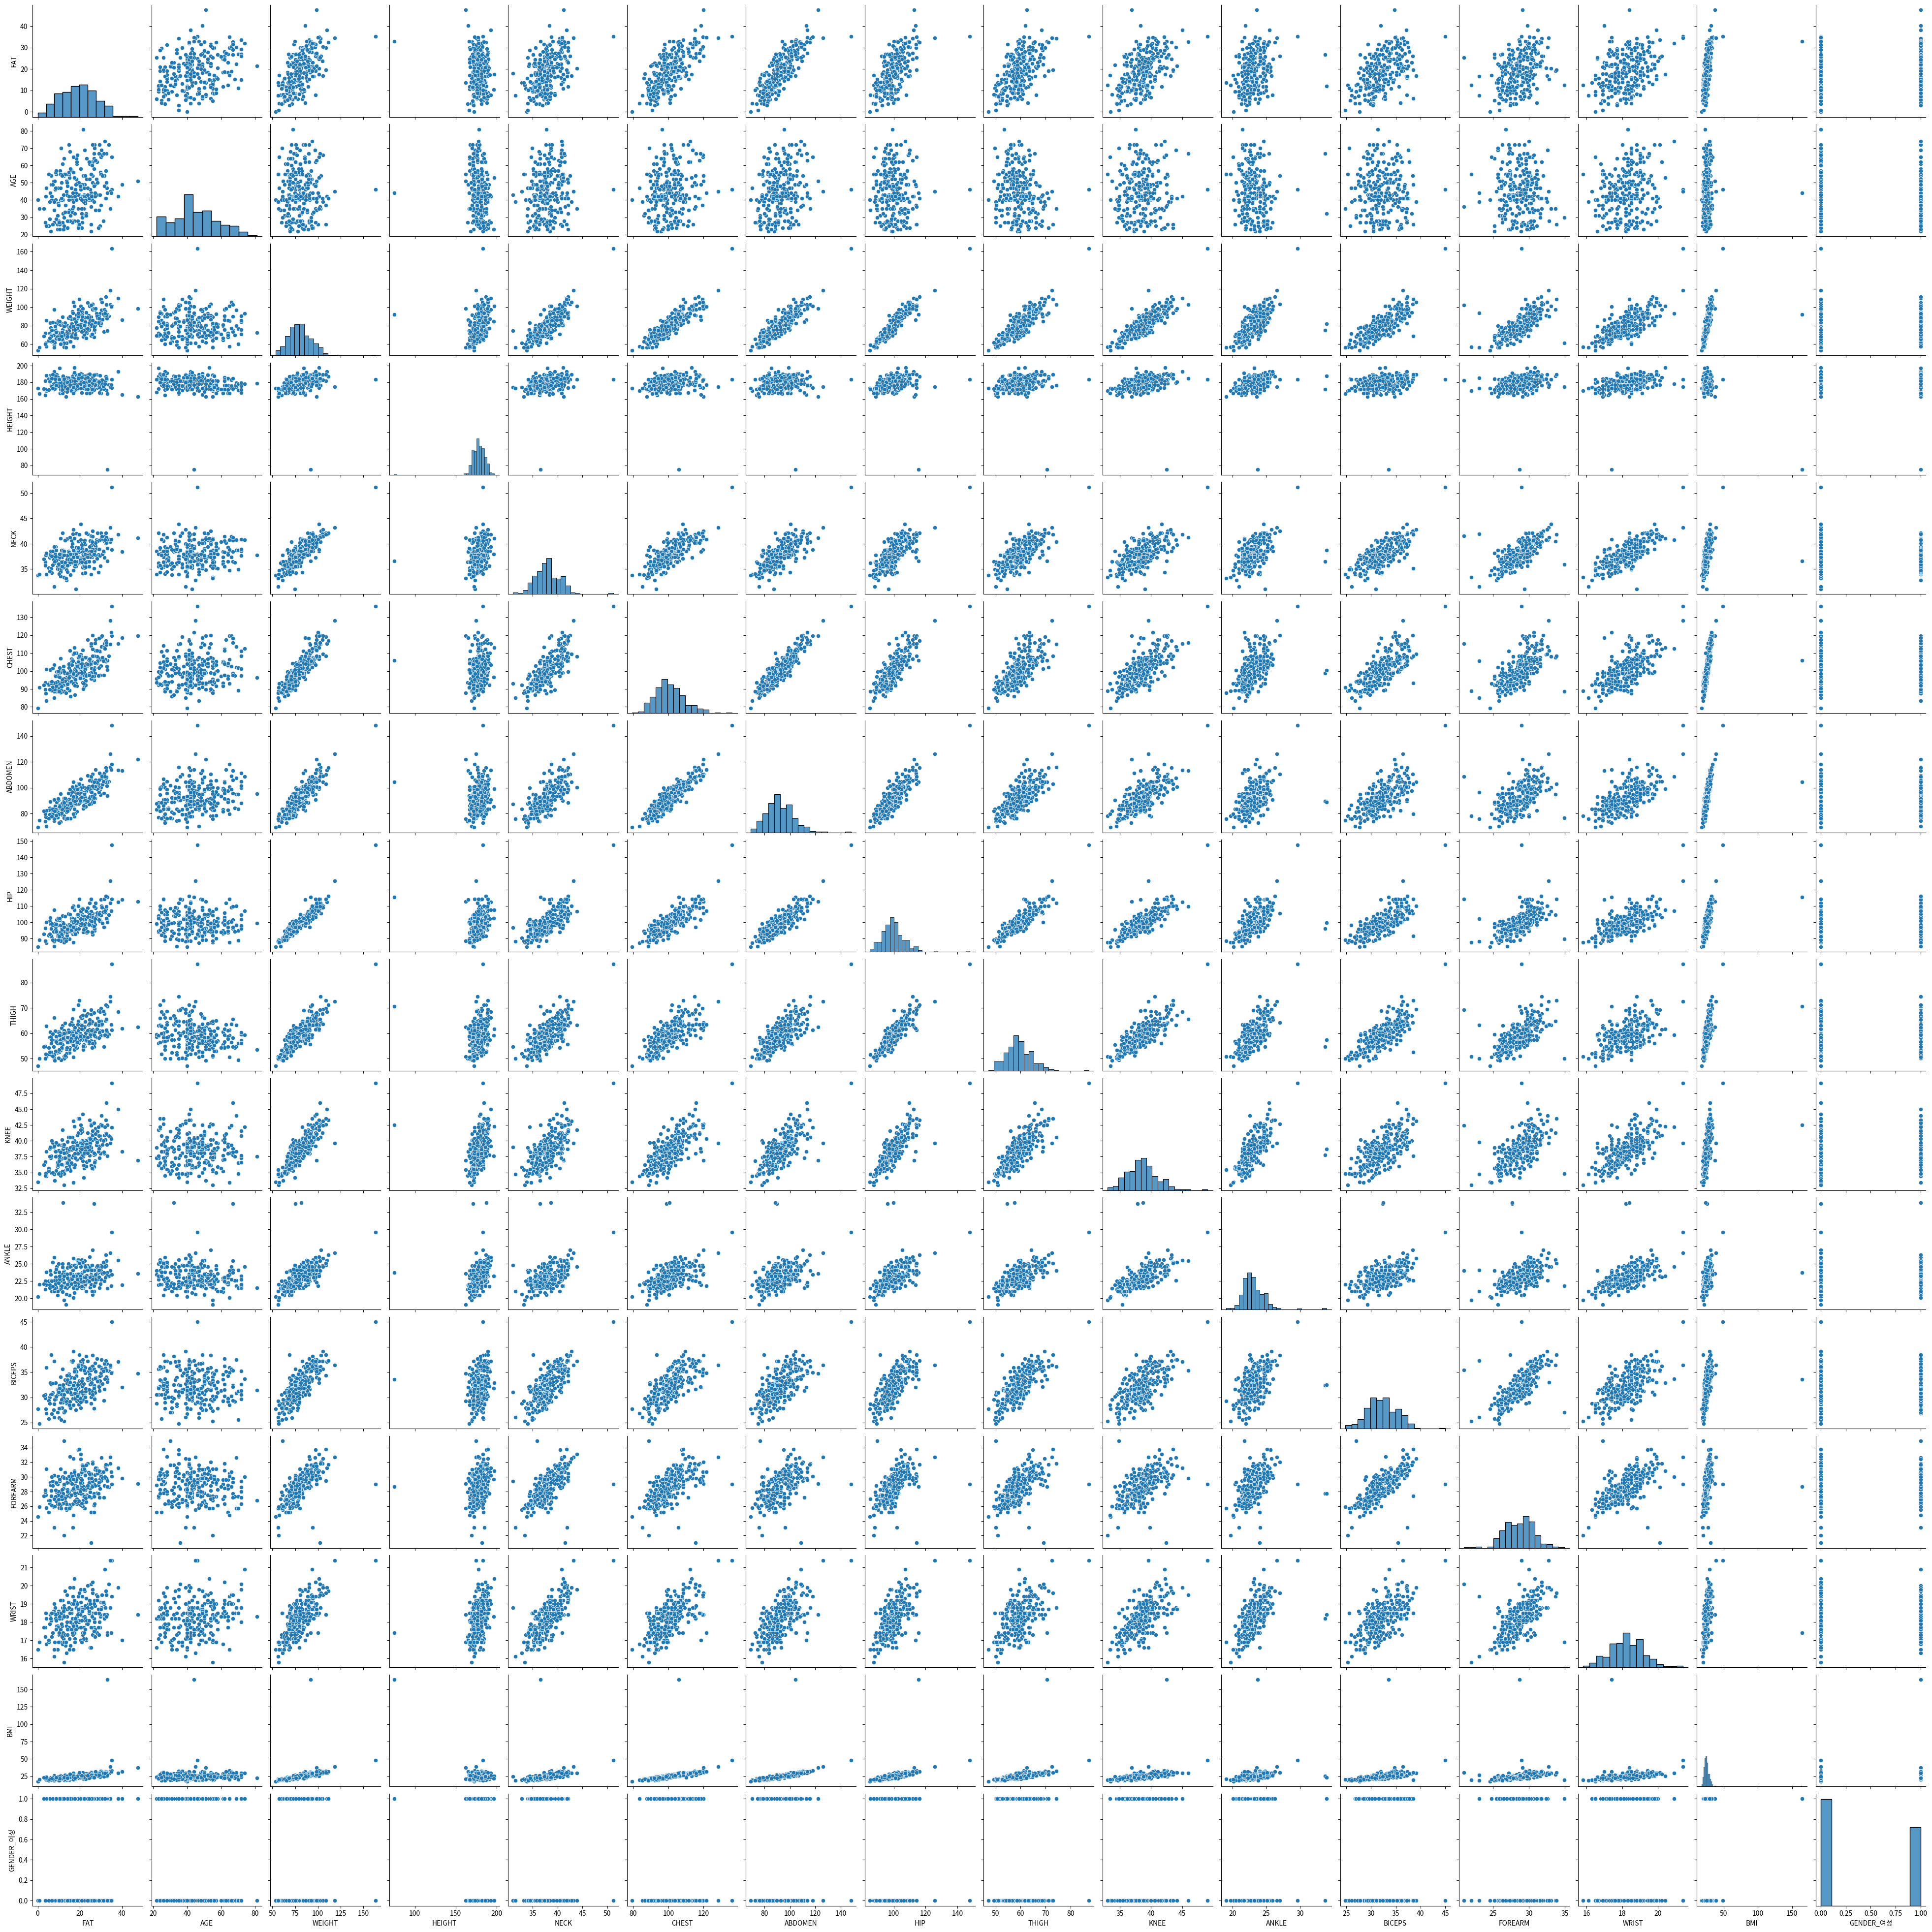

In [11]:
sns.pairplot(df_raw_dummy)

In [12]:
df_raw_dummy.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI,GENDER_여성
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371,-0.033
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040,-0.063
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730,0.391,-0.009
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322,-0.638,0.025
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266,0.010
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383,-0.014
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415,-0.017
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462,-0.042
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433,-0.040
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364,-0.034


In [13]:
df_train,df_test = train_test_split(df_raw_dummy, test_size = 0.4, random_state = 1234)
print("train data size : {}". format(df_train.shape))
print("test data size : {}". format(df_test.shape))

train data size : (151, 16)
test data size : (101, 16)


In [14]:
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
                               KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI + GENDER_여성", data = df_train)

In [15]:
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     29.46
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.84e-35
Time:                        20:24:52   Log-Likelihood:                -424.70
No. Observations:                 151   AIC:                             881.4
Df Residuals:                     135   BIC:                             929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.9058     31.813     -1.600      0.1

In [16]:
df_train_x = df_train.drop('FAT',axis = 1)
df_train_x_const = add_constant(df_train_x)

In [17]:
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i)\
                for i in range(df_train_x_const.shape[1])]

In [18]:
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
15,GENDER_여성,1.08
12,FOREARM,1.92
10,ANKLE,2.22
1,AGE,2.40
11,BICEPS,3.40
13,WRIST,3.45
4,NECK,4.67
9,KNEE,5.32
8,THIGH,9.29
14,BMI,10.55


In [19]:
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
                               KNEE + ANKLE + BICEPS + FOREARM + WRIST + BMI + GENDER_여성", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     30.82
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.38e-35
Time:                        20:25:06   Log-Likelihood:                -426.50
No. Observations:                 151   AIC:                             883.0
Df Residuals:                     136   BIC:                             928.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0135     10.981      0.274      0.7

In [20]:
df_train_x = df_train.drop(["FAT", "WEIGHT"], axis = 1)
df_train_x_const= add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
14,GENDER_여성,1.06
11,FOREARM,1.92
9,ANKLE,2.03
1,AGE,2.36
10,BICEPS,3.21
12,WRIST,3.43
3,NECK,3.94
8,KNEE,5.21
2,HEIGHT,6.78
13,BMI,6.88


In [21]:
reg_model = smf.ols(formula = "FAT ~   HEIGHT + NECK  + ABDOMEN  + \
                                 FOREARM  + BMI + GENDER_여성", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     67.14
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.80e-39
Time:                        20:25:18   Log-Likelihood:                -433.61
No. Observations:                 151   AIC:                             881.2
Df Residuals:                     144   BIC:                             902.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7260      9.901      0.982      0.3

In [22]:
df_train_x = df_train[["HEIGHT", "NECK", "ABDOMEN", "BMI", "FOREARM","GENDER_여성"]]
df_train_x_const= add_constant(df_train_x)

In [23]:
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i)\
                for i in range(df_train_x_const.shape[1])]

In [24]:
df_vif.sort_values("VIF", inplace = True)
df_vif.round(2)

,variable,VIF
6,GENDER_여성,1.02
5,FOREARM,1.49
3,ABDOMEN,2.55
2,NECK,2.89
1,HEIGHT,3.58
4,BMI,3.72
0,const,772.65


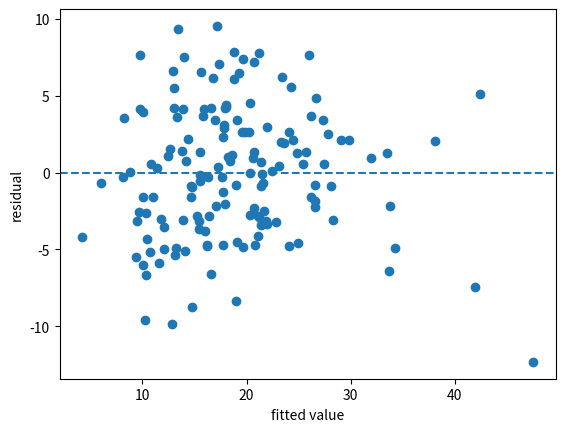

In [25]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

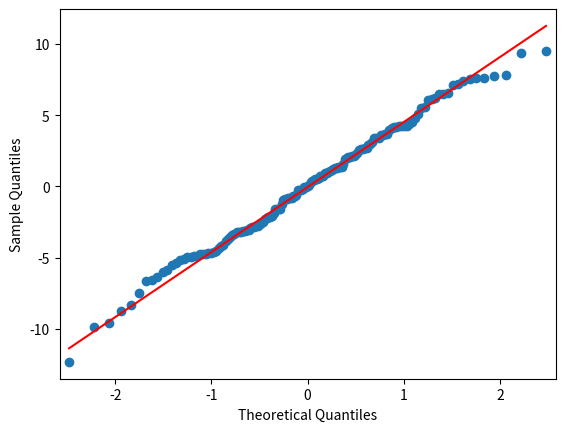

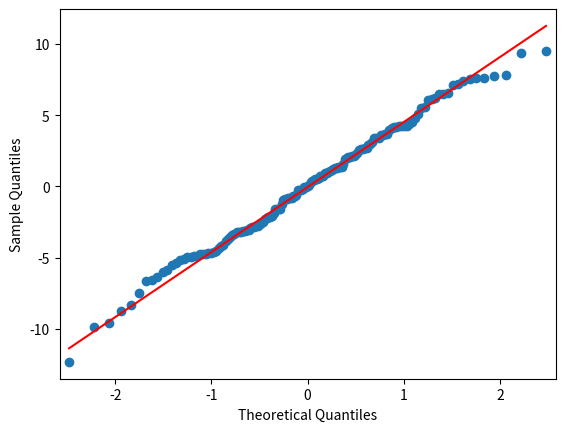

In [26]:
qqplot(reg_result.resid, line = "q")

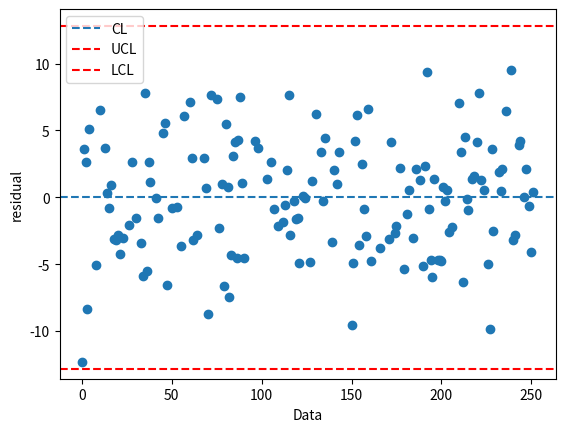

In [27]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data") 
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--",label = 'CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle = "--", color = "red", label = 'UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle = "dashed", color = "red", label = 'LCL')
plt.legend()

In [28]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수:", r2_score(df_test['FAT'], test_pred))

train data의 결정계수: 0.736661531966096
test data의 결정계수: 0.689926735630488


In [52]:
df_train_y = df_train["FAT"]
df_train_x = df_train.drop('FAT', axis = 1)
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)
selected_cols = df_train_x.columns[rfe.support_]
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['WEIGHT', 'ABDOMEN', 'FOREARM', 'WRIST', 'BMI'], dtype='object')
Removed Variables : Index(['AGE', 'HEIGHT', 'NECK', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'ANKLE',
       'BICEPS', 'GENDER_여성'],
      dtype='object')


In [60]:
rfe_reg_model = smf.ols(formula = "FAT ~ WEIGHT + ABDOMEN + FOREARM + WRIST + BMI", data = df_train)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     86.33
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.06e-41
Time:                        19:53:45   Log-Likelihood:                -430.13
No. Observations:                 151   AIC:                             872.3
Df Residuals:                     145   BIC:                             890.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.1756      9.015     -5.566      0.0